In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns   

In [42]:
doc = "C:\\Users\\DELL\\OneDrive\\Área de Trabalho\\Ironhack\\week 5\\lab-eda-univariate\\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(doc)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [43]:
df.shape

(2443651, 9)

In [44]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [45]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('bool'), dtype('O')]

In [46]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [47]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [48]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 45]
potential_categorical_from_numerical

,stars,boughtInLastMonth
0,4.7,0
1,4.7,0
2,4.7,0
3,4.7,0
4,4.6,0
...,...,...
2443646,0.0,0
2443647,0.0,0
2443648,0.0,0
2443649,4.3,0


In [49]:
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [50]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [58]:
df_categorical = pd.concat([df.select_dtypes("object"), df.select_dtypes("boolean"), potential_categorical_from_numerical], axis=1)
df_categorical

,asin,title,category,isBestSeller,stars,boughtInLastMonth
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,False,4.7,0
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers,True,4.7,0
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,False,4.7,0
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers,False,4.7,0
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers,False,4.6,0
...,...,...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing,False,0.0,0
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing,False,0.0,0
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing,False,0.0,0
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing,False,4.3,0


In [55]:
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical

,uid,reviews,price
0,1,15308,21.99
1,2,98099,23.99
2,3,15308,21.99
3,4,7205,31.99
4,5,1881,17.99
...,...,...,...
2443646,2828589,0,22.34
2443647,2828590,0,97.99
2443648,2828591,0,52.99
2443649,2828592,404,79.99


In [60]:
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns) + len(df.select_dtypes("boolean").columns)

True

In [61]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [ ]:
df.drop("uid", inplace=True, axis=1)

In [68]:
frequency_table = df['category'].value_counts()
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Motorbike Chassis                            107
 Alexa Built-In Devices                       107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Motorbike Chassis                         0.000044
 Alexa Built-In Devices  

In [67]:
my_table = pd.crosstab(index = df_categorical["category"], 
                              columns="count")      
my_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [69]:
# Which are the top 5 most listed product categories?

my_table.sort_values(by="count", ascending=False).head(5)


col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


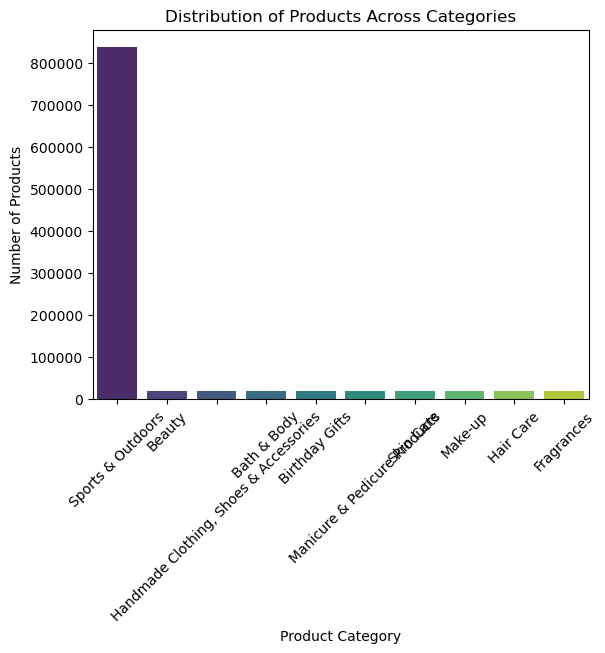

In [77]:
# Display the distribution of products across different categories using a bar chart.
# If you face problems understanding the chart, do it for a subset of top categories.
 
# First we sort the table in descending order and filter top categories
sorted_table = my_table.sort_values(by="count", ascending=False).head(10)   

# Then we plot the bar chart
sns.barplot(x=sorted_table.index, y=sorted_table["count"], hue=sorted_table.index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Products Across Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.show()


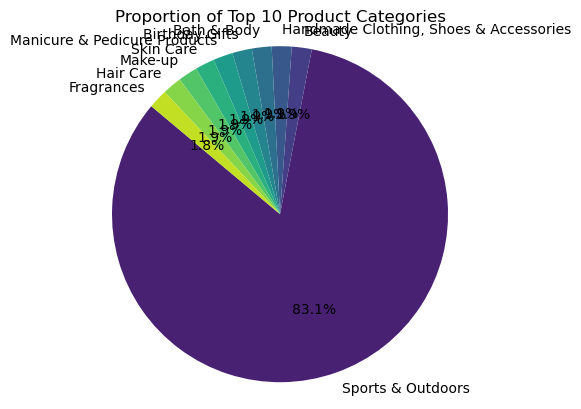

In [78]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

plt.pie(sorted_table["count"], labels=sorted_table.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(sorted_table)))  
plt.title("Proportion of Top 10 Product Categories")
plt.axis('equal')  
plt.ylabel('') 
plt.show()


In [ ]:
# Sports and Outdoors appears to dominate the listings with the highest proportion among the top categories.

In [80]:
price_mean = df["price"].mean()
price_median = df["price"].median()
price_mode = df["price"].mode()[0]

price_mean, price_median, price_mode

(np.float64(89.24380943923663), 19.09, np.float64(9.99))

In [ ]:
# We can see that the mean price is higher than both the median and mode, indicating a right-skewed distribution likely 
# influenced by some high-priced outliers. The average price is around 89.24, while the mode is lower, at 9.99.

In [81]:
price_variance = df["price"].var()
price_std_dev = df["price"].std()   
price_range = df["price"].max() - df["price"].min()
price_interquartile_range = df["price"].quantile(0.75) - df["price"].quantile(0.25)

price_variance, price_std_dev, price_range, price_interquartile_range

(119445.48532256528, 345.60886175352226, 100000.0, np.float64(36.0))

In [ ]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?
# The prices are highly varied, as indicated by a large range of prices and a substantial standard deviation (~345,61).

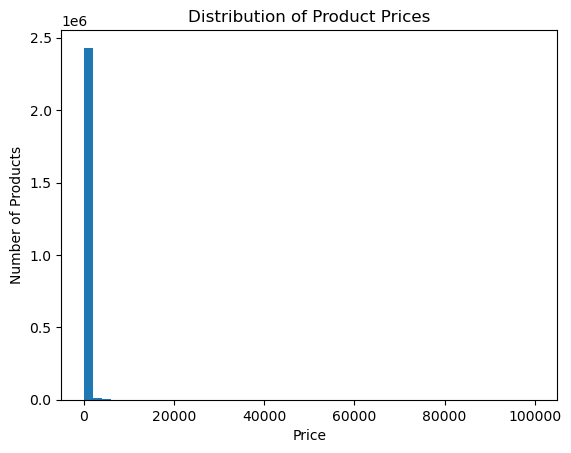

In [88]:
plt.hist(df["price"], bins=50)
plt.title("Distribution of Product Prices") 
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.show()

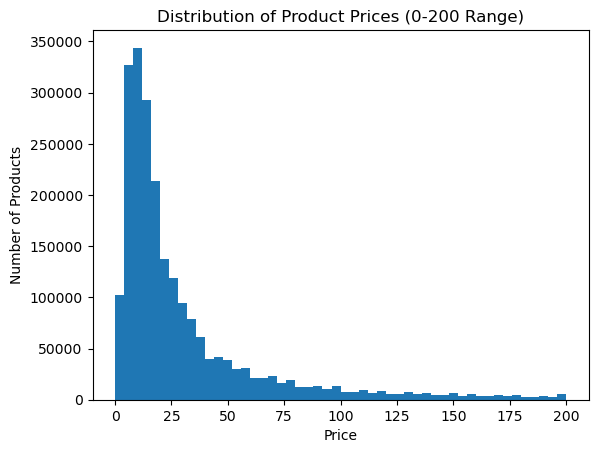

In [90]:
# The histogram presented like this is really hard to interpret due to the extreme values in the price data.
# A better approach would be to limit the x-axis to a reasonable range, for example, say 0 to 200.

plt.hist(df["price"], bins=50, range=(0, 200))
plt.title("Distribution of Product Prices (0-200 Range)")
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.show()

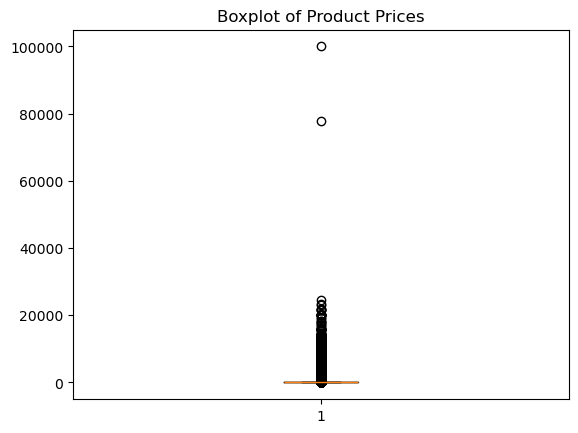

In [ ]:
plt.boxplot(x=df["price"])
plt.title("Boxplot of Product Prices")  
plt.show()

# Are there products that are priced significantly higher than the rest? Yes, there are a lot of outliers.


In [92]:
rating_mean = df["stars"].mean()
rating_median = df["stars"].median()
rating_mode = df["stars"].mode()[0] 

rating_mean, rating_median, rating_mode

(np.float64(2.152836472966065), 0.0, np.float64(0.0))

In [ ]:
# The majority of products don't have ratings, and because of that, the median and mode are both 0. 
# The mean rating is slightly higher at around 2.15.

In [94]:
rating_variance = df["stars"].var()
rating_std_dev = df["stars"].std()   
rating_range = df["stars"].max() - df["stars"].min()
rating_interquartile_range = df["stars"].quantile(0.75) - df["stars"].quantile(0.25)

rating_variance, rating_std_dev, rating_range, rating_interquartile_range

(4.81743402976196, 2.1948653785054697, 5.0, np.float64(4.4))

In [ ]:
# With a variance of approximately 4.82 and a standard deviation of about 2.19, the ratings show a wide spread. 
# The range of 5.0 indicates that ratings span the entire possible scale from 0 to 5, and the interquartile range of 4.4 
# suggests that the middle 50% of ratings are also quite spread out.

In [95]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

In [ ]:
# Are the ratings normally distributed, or do they lean towards higher or lower values?
# No, the ratings do not appear to be normally distributed. 

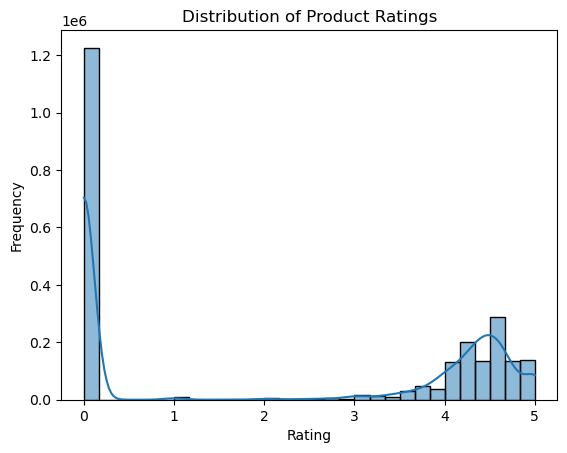

In [ ]:
sns.histplot(df["stars"], bins=30, kde=True)
plt.title("Distribution of Product Ratings")        
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# The graph shows that the most frequent ratings are zero, with a significant number of products having no ratings at all.